In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
data_frame = pd.read_csv('supervised.csv')

n = 65

a1 = np.sort(data_frame.iloc[:,0].unique())
a2 = np.sort(data_frame.iloc[:,1].unique())
np.array_equal(a1, a2, equal_nan=False)
team_dict={}
count = 0
for i in a1:
  team_dict[i] = count
  count+=1
num_teams = len(a1)
temp = np.empty((len(data_frame),len(a1)))
temp2 = np.empty((len(data_frame),len(a1)))
for i in range(len(data_frame)):
  temp[i] = np.zeros(num_teams)
  temp[i,team_dict[data_frame.iloc[i,0] ]] = 1
  temp2[i] = np.zeros(num_teams)
  temp2[i,team_dict[data_frame.iloc[i,1] ]] = 1
#print(data_frame.iloc[i])


data_frame=data_frame.drop(columns=['date','home_points','away_points','home_elo_before','away_elo_before']) #####INCORPORATE DATE LATER
#print(data_frame.iloc[i])
x = data_frame.to_numpy()

x =  np.concatenate((temp,temp2,x),axis = 1)
#print(x[0,60],x[0,61])
x= np.delete(x,60,axis = 1)
x =np.delete(x,60,axis = 1)
x = torch.tensor(x.astype(float))
#print(x[0])
x.shape

torch.Size([3434, 95])

In [36]:
#randomly shuffle
x=x[torch.randperm(x.size()[0])]
num_train = int(x.shape[0] *0.8)
num_test = x.shape[0] - num_train
print(num_train,num_test)
x_train = x[:num_train,:-1]
y_train = x[:num_train,-1]
x_test = x[num_train:,:-1]
y_test = x[num_train:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

2747 687
torch.Size([2747, 94]) torch.Size([2747]) torch.Size([687, 94]) torch.Size([687])


In [47]:
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import models, layers
from keras import optimizers
from keras.models import Sequential
#from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation

from sklearn.utils import shuffle
np_xtrain = x_train.numpy()
np_ytrain = y_train.numpy()
np_xtest = x_test.numpy()
np_ytest = y_test.numpy()
model = models.Sequential([
    #layers.Flatten(input_shape=(99,)), 
    #layers.Dropout(0.25),
    layers.Dense(99, activation=tf.nn.relu), 
    #layers.Dropout(0.5),
    #layers.Dense(500, activation=tf.nn.relu), 
    #layers.Dropout(0.5),
    layers.Dense(200, activation=tf.nn.relu),
    layers.Dropout(0.5),
    layers.Dense(100, activation=tf.nn.relu),
    #layers.Dense(100, activation=tf.nn.relu),
    #layers.Dense(100, activation=tf.nn.relu),
    layers.Dense(50, activation=tf.nn.relu),
    layers.Dropout(0.5),
    layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #'adam'



In [ ]:
history = model.fit(np_xtrain, np_ytrain,validation_data = (np_xtest,np_ytest), epochs=50, batch_size=50)

Epoch 1/65
55/55 [==============================] - 2s 21ms/step - loss: 57.1119 - accuracy: 0.5126 - val_loss: 18.4586 - val_accuracy: 0.5444
Epoch 2/65
55/55 [==============================] - 1s 9ms/step - loss: 49.9543 - accuracy: 0.4944 - val_loss: 14.6423 - val_accuracy: 0.5415
Epoch 3/65
55/55 [==============================] - 0s 7ms/step - loss: 41.7068 - accuracy: 0.4929 - val_loss: 10.1413 - val_accuracy: 0.5400
Epoch 4/65
55/55 [==============================] - 0s 8ms/step - loss: 34.4902 - accuracy: 0.5126 - val_loss: 7.3885 - val_accuracy: 0.5415
Epoch 5/65
55/55 [==============================] - 0s 8ms/step - loss: 31.2146 - accuracy: 0.5166 - val_loss: 7.0940 - val_accuracy: 0.5560
Epoch 6/65
55/55 [==============================] - 0s 9ms/step - loss: 26.7879 - accuracy: 0.5228 - val_loss: 5.7385 - val_accuracy: 0.5721
Epoch 7/65
55/55 [==============================] - 0s 9ms/step - loss: 23.7625 - accuracy: 0.5020 - val_loss: 4.4984 - val_accuracy: 0.5924
Epoch 8/6

22/22 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6084
Test accuracy: 0.608442485332489


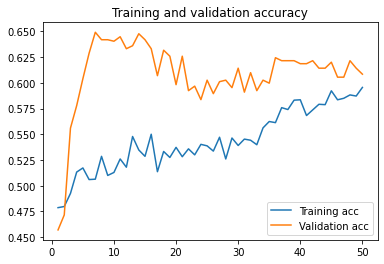

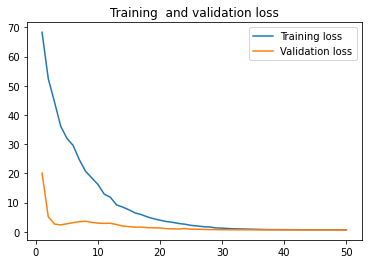

In [ ]:
test_loss, test_acc = model.evaluate(np_xtest, np_ytest)

print('Test accuracy:', test_acc)
acc = history.history['accuracy']
#print(history.history.keys())
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training  and validation loss')
plt.legend()
plt.show()